In [22]:
import pandas as pd

df = pd.read_excel('data/客户信息.xlsx')

df

,年龄(岁),收入(万元)
0,50,66
1,44,51
2,30,56
3,46,50
4,32,50
...,...,...
107,30,30
108,32,29
109,24,18
110,24,15


In [23]:
df.head(5)

,年龄(岁),收入(万元)
0,50,66
1,44,51
2,30,56
3,46,50
4,32,50


In [24]:
df.describe()

,年龄(岁),收入(万元)
count,112.000000,112.000000
mean,37.187500,43.625000
std,8.048872,16.220955
min,21.000000,15.000000
25%,30.000000,27.750000
50%,37.500000,48.500000
75%,44.000000,54.250000
max,52.000000,74.000000


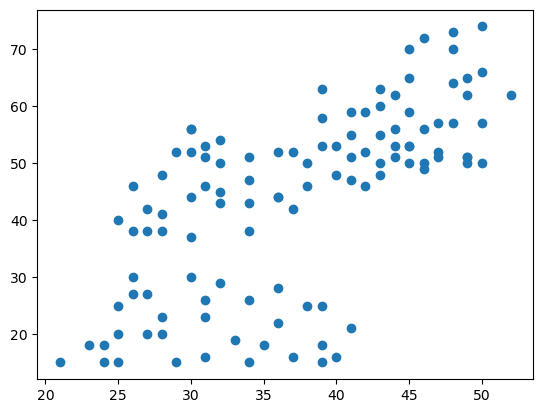

In [25]:
import matplotlib.pyplot as plt

plt.scatter(df['年龄(岁)'], df['收入(万元)'])

In [26]:
from sklearn.metrics import silhouette_score

X = df.values

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

silhouette_avg = silhouette_score(X, kmeans.labels_)

print(silhouette_avg)

D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.5843364806986523


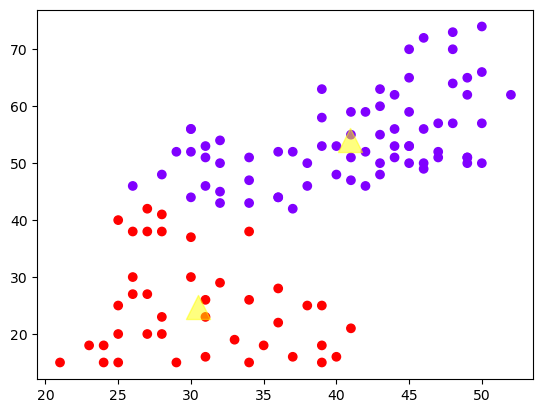

In [28]:
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='rainbow')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', alpha=0.5, marker='^')

In [29]:
df['cluster'] = kmeans.labels_

df['cluster_labels'] = df['cluster'].map({0: '高净值', 1: '低净值'})

df

,年龄(岁),收入(万元),cluster,cluster_labels
0,50,66,0,高净值
1,44,51,0,高净值
2,30,56,0,高净值
3,46,50,0,高净值
4,32,50,0,高净值
...,...,...,...,...
107,30,30,1,低净值
108,32,29,1,低净值
109,24,18,1,低净值
110,24,15,1,低净值
